# Многомерная гусеница: выбор длины и числа компонент гусеницы

## курс "Математические методы прогнозирования"


### Бишук Антон

### Введение:

Работа посвящена исследованию одного из методов анализа многомерных временных рядов - метода "гусеницы", также известного как `Singular Spectrum Analysis` или `SSA`.
Метод можно разделить на четыре этапа - представление временного ряда в виде матрицы при помощи сдвиговой процедуры, вычисление ковариационной матрицы выборки и сингулярное ее разложение, отбор главных компонент, относящихся к различным составляющим ряда (от медленно меняющихся и периодических до шумовых), и, наконец, восстановление ряда.

Областью применения алгоритма являются задачи как метеорологии и геофизики, так и экономики и медицины. 

### Цель:

Целью данной работы является выяснение зависимости эффективности алгоритма от выбора параметров, используемых в его работе.

### Преамбула:

* Данная работа основана на [отчете](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%B3%D1%83%D1%81%D0%B5%D0%BD%D0%B8%D1%86%D0%B0%2C_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80_%D0%B4%D0%BB%D0%B8%D0%BD%D1%8B_%D0%B8_%D1%87%D0%B8%D1%81%D0%BB%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82_%D0%B3%D1%83%D1%81%D0%B5%D0%BD%D0%B8%D1%86%D1%8B_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80)) Любовь Леонтьевой [2011 года].

* Оригинальная реализация модели `SSA` представлена по следующей [ссылке](https://github.com/aj-cloete/pssa).  

---

## Постановка задачи

Дан временной ряд:
$$T = \left\{x_i\right\}_{i=1}^n,$$
где $n$ — длина временного ряда, $i$ — номер отсчета.

`Предполагается`, что в рассматриваемом временном ряду нет пропущенных значений и он имеет периодическую составляющую с периодом $\tau$, на который и производится прогноз.

Требуется, задав параметр $l: 1 < l < n$ (длину гусеницы) разложить ряд в сумму компонент (используя Метод главных компонент), выбрать часть из них и построить по ним продолжение ряда $\left\{x_i\right\}_{i=1}^{n+\tau}$.

Для контроля качества алгоритма прогноза разбиваем множество индексов $N=1,\ldots,n$ на два подмножества:

* $J_1=n-\tau+1,\ldots,n$;
* $J_2=1,\ldots,n-\tau$.

Выделяем во временном ряде $T$ последовательных значений $\left\{x_i| i\in J_1\right\}$ (контрольную выборку), которые с помощью алгоритма прогнозируем по предыдущим значениям $\left\{x_i| i\in J_2\right\}$ (Обучение с учителем). Для контроля качества прогноза использовались два функционала качества: SSE (сумма квадратов ошибок) и MAPE (средняя абсолютная процентная ошибка):

$$SSE = \sum\limits_{i=1}^{\tau}|\tilde x_i-x_i|^2,$$

$$MAPE = \frac{100}{\tau}\sum\limits_{i=1}^{\tau}\frac{|\tilde x_i-x_i|}{|x_i|},$$

где $\tilde x_i, x_i$ — cпрогнозированное и фактическое значение ряда в точке $i$ соответственно.


---

## Решение задачи

### Анализ

Для последующего разложение ряда по главным компонентам преобразуем ряд в матрицу $X$:

$$
X = \begin{pmatrix}x_1&x_2&\ldots&x_{k}\\x_2&x_3&\ldots&x_{k+1}\\ \vdots&\vdots&\ddots&\vdots\\x_{l}&x_{l+1}&\ldots&x_n \end{pmatrix},
$$

где $k=n-l+1$, $k$ — время жизни гусеницы. Такую матрицу будем называть нецентрированной траекторной матрицей, порожденной гусеницей длины $l$.

Проводимый в дальнейшем анализ главных компонент может проводиться как по центрированной, так и по нецентрированной выборкам. Для упрощения выкладок рассмотрим простейший нецентрированный вариант.

Построим ковариационную матрицу:

$$C = \frac1k X^TX.$$

Выполним её сингулярное разложение:

$$C = V\Lambda V^T,$$

где $\Lambda = \mbox{diag}(\lambda_1, \ldots, \lambda_l)$ — диагональная матрица собственных чисел, $V=[v^{(1)}, \ldots, v^{(l)}]$ — ортогональная матрица собственных векторов. 

При этом будем предполагать, что собственные векторы упорядочены по убыванию соответствующих собственных чисел, то есть:

$$\lambda_1 > \lambda_2 > \ldots > \lambda_l.$$

Вычислим матрицу $U$ нецентрированных главных компонент:
$$U = V^T X = (U_1,\ldots, U_l)^T.$$

Восстановим траекторную матрицу по некоторому поднабору главных компонент, то есть для $\tilde V = [v^{(i_1)}, \ldots, v^{(i_r)}]$, ($r \le l$) и $\tilde U = \tilde V^T X$ вычисляется матрица $\tilde X = \tilde V \tilde U$.

После восстановления матрицы $\tilde X$ исходная последовательность восстанавливается усреднением по побочным диагоналям матрицы $\tilde X$:

$$
\tilde x_s = \left\{\begin{array}{lc} \frac{1}{s} \sum\limits_{j=1}^s \tilde x_{j, s-j+1}&1 \le s \le l,\\ \frac{1}{l} \sum\limits_{j=1}^{l} \tilde x_{j, s-j+1}&l \le s \le k,\\ \frac{1}{n-s+1} \sum\limits_{j=1}^{n-s+1} \tilde x_{j+s-k, k-j+1}&k \le s \le n. \end{array} \right.
$$

С геометрической точки зрения операция получения главных компонент есть изображение исходной выборки в базисе, составленном из выбранных собственных векторов, а восстановление — проектирование исходной выборки на гиперплоскость, порожденную выбранным набором собственных векторов ковариационной матрицы.

### Прогноз

Перейдем к прогнозированию временных рядов методом гусеницы. Для начала необхоимо определиться с тем, что будет пониматься под продолжением ряда.

Числовой ряд $\left\{x_i\right\}_{i=1}^{n+1}$ называется `продолжением ряда` $\left\{x_i\right\}_{i=1}^n$, если выборка, порождаемая им при гусеничной обработке, лежит в той же гиперплоскости, что и у исходного ряда.

Рассмотрим систему уравнений:

$$
\left\{\begin{array}{lcl}\sum\limits_{j=1}^s h_j v^j_1&=&x_{n-l+1},\\&\ldots&\\ \sum\limits_{j=1}^s h_j v^j_{l-1}&=&x_n.\\ \end{array}\right.
$$

Введем следующие обозначения: 

* $$\mathbf{v}=(v_l^{(i_1)},v_l^{(i_2)}, \ldots, v_l^{(i_r)})\text{ , где  }0<i_1<\ldots<i_r<l,$$  



* $$
V^* = \begin{pmatrix}v_1^{(i_1)}&v_1^{(i_2)}& \ldots& v_1^{(i_r)}\\v_2^{(i_1)}&v_2^{(i_2)}& \ldots& v_2^{(i_r)}\\ \vdots&\vdots&\ddots&\vdots\\v_{l-1}^{(i_1)}&v_{l-1}^{(i_2)}& \ldots& v_{l-1}^{(i_r)}\end{pmatrix}.
$$

Заметим, что
$$
\tilde V=\begin{pmatrix}V^*\\ \mathbf{v} \end{pmatrix}.
$$

Также пусть:
* $$Q={\left(\;q_i^{\;}\right)}_{i=1}^{l-1}=(x_{n-l+2},\ldots,x_n)^T,$$  
  
  
* $$\mathbf{h}=(h_1,\ldots,h_r)^T.$$

В этих обозначениях система уравнений запишется как

$$V^* \mathbf{h} = Q.$$

`Обобщенным решением системы` $V^*h = Q$ назовем решение системы:

$$
(V^*)^T V^* \mathbf{h}=(V^*)^T Q.
$$

Назовем `обобщенным продолжением рассматриваемого ряда` величину:

$$b =\mathbf{v}\mathbf{h}^*,$$

где $\mathbf{h}^*$ — решение системы $V^* \mathbf{h} = Q$.

Учитём систему $ V^* \mathbf{h} = Q$ и можем записать следующую формулу:  
  
$$x_{n+1}=\mathbf{v}\left(\left(V^*\right)^T V^*\right)^{-1}\left(V^*\right)^T Q.$$


---

### Рекомендации к выбору параметров

#### Длины гусеницы:

* Сингулярные разложения одного и того же ряда длины $n$, соответствующие выбору `длины гусеницы l и n-l+1 эквивалентны`. Следовательно, для анализа структуры временного ряда не имеет смысла брать длину гусеницы, большую чем половина длины ряда.  
  
  
* `Чем больше длина` гусеницы, `тем более детальным получается разложение` исходного ряда. Таким образом, наиболее детальное разложение достигается при выборе длины гусеницы, приблизительно равной половине длины ряда $(l \sim \frac{n}{2})$.  
  
  
* `Маленькая длина` гусеницы может привести к `смешиванию интерпретируемых компонент` ряда.  
  
  
* При решении задачи выделения периодической компоненты с периодом $\tau$ следует выбирать `длину гусеницы l кратной τ`. Это не строгая рекомендация, но благодаря ей мы можем качественно интерпретировать результаты.

#### Отбором главных компонент:

Пусть длина гусеницы $l$ фиксирована и мы уже имеем сингулярное разложение траекторной матрицы исходного ряда. Тогда следующим шагом является группировка членов сингулярного разложения:

* Если мы восстановили компоненту ряда только с помощью одной собственной тройки (собственное значение, собственный вектор и главная компонента) и `оба сингулярных вектора имеют похожую форму, то восстановленная компонента будет иметь примерно такую же форму`. 

    _Это правило означает, что, имея дело с единственной собственной тройкой, часто можно предсказать поведение соответствующей компоненты временного ряда. Например, если оба сингулярных вектора собственной тройки похожи на линейные ряды, то соответствующая составляющая ряда также будет близкой к линейной. Если сингулярные векторы имеют экспоненциальную форму, то и компонента ряда будет такой же. Монотонные сингулярные векторы соответствуют монотонной компоненте ряда. Синусоидальные векторы порождают гармоническую составляющую ряда._  
    
  
* Чем `больше собственное значение` главной компоненты, тем `больше вклад` соответствующей восстановленной компоненты ряда.

## Эксперимент:

Будем исследовать работу алгоритма на следующих данных:

* Noisy sin()

TODO:
* [AirPassengers](https://github.com/aj-cloete/pssa/blob/master/AirPassengers.csv)
* [Minimum Daily Temperatures Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pssa.SSA import SSA
from IPython.core.display import Image
from tqdm.notebook import tqdm

from sklearn.metrics import mean_squared_error

# from sklearn.metrics import mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred, eps = 1e-8): 
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.max(np.where(y_true == 0, eps, y_true)))) * 100

In [2]:
n = 700
n_train = int(0.8 * n)
x = np.linspace(0, 50 * np.pi, n)
SIN = np.sin(0.1 * x)
SIN_noise = np.sin(0.1 * x) + np.random.normal(loc = 0.0, scale = .2, size = n) * np.random.binomial(1, 0.5, n)

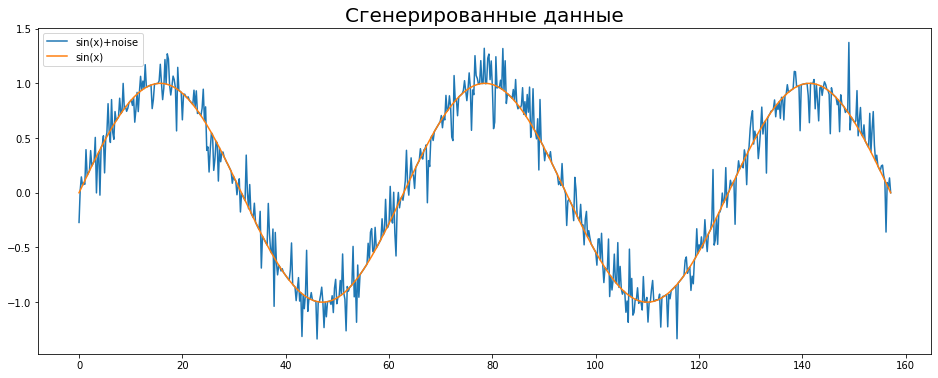

In [3]:
plt.figure(figsize=(16, 6))
plt.plot(x, SIN_noise, label = "sin(x)+noise")
plt.plot(x, SIN, label="sin(x)")
plt.title('Сгенерированные данные', fontsize=20)
plt.legend()

In [4]:
pd_SIN_noise_train = pd.DataFrame(SIN_noise[:n_train].reshape(-1,1))
pd_SIN_noise_test  = pd.DataFrame(SIN_noise[n_train:].reshape(-1,1))

In [5]:
ssa = SSA(pd_SIN_noise_train)

In [192]:
l   = int(n / 2)     # Длина окна
tau = int(31)        # Подгонка под то, чтобы окно делилось на частоту

ssa.embed(embedding_dimension = l, suspected_frequency = tau, verbose=False)
ssa.decompose(verbose = False)

pred = ssa.forecast_recurrent(steps_ahead=n - n_train , singular_values=[0,1,2], plot=False, return_df=True)

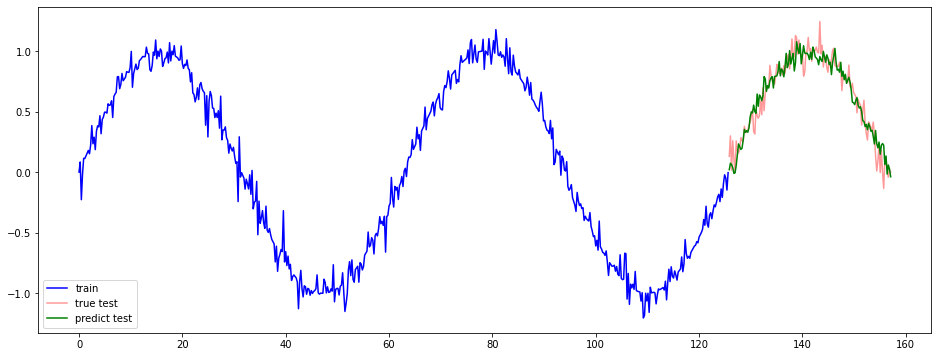

In [193]:
plt.figure(figsize=(16, 6))

plt.plot(x[:n_train],list(pred["Original"][:n_train])     , c='b', label = "train")
plt.plot(x[n_train:],list(pd_SIN_noise_test[0]), alpha=0.4, c='r', label = "true test")
plt.plot(x[n_train:],list(pred["Forecast"][n_train:])     , c='g', label = "predict test")
plt.legend()

In [5]:
res = []

L = np.arange(5, int(n / 5), 2)
n_com = np.arange(1, int(n / 7), 1)

y_test = list(pd_SIN_noise_test[0])

for l in tqdm(L):
    for i in n_com:
        if l <= i:
            continue
            
        ssa = SSA(pd_SIN_noise_train.copy())
            
        ssa.embed(embedding_dimension = l, verbose=False)
        ssa.decompose(verbose = False)
        pred = ssa.forecast_recurrent(steps_ahead = len(y_test) , singular_values=[j for j in range(len(ssa.s))][:i]\
                                      , plot=False, return_df=True)
        y_pred = np.array(list(pred["Forecast"][n_train:]))
        
        if np.isinf(y_pred).any() == True:
            continue
        
        del ssa
        
        metric1 = mean_absolute_percentage_error(y_test,y_pred)
        metric2 = len(y_pred) * mean_squared_error(y_test,y_pred)
        metric1 = metric1 if metric1 < 1000 else 1000
        metric2 = metric2 if metric2 < 1000 else 1000
        
        res.append([l, i, metric1, metric2])

In [ ]:
X = np.array(res)[:,0]
Y = np.array(res)[:,1]
Z = np.where(np.array(res)[:, 2] > 1000, 1000, np.array(res)[:, 2])

for angle in range(30, 170, 2):
    fig = plt.figure(figsize=(15,13))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z , cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_title('Зависимоть MAPE от параметров модели SSA для функции sin(x)',fontsize = 18)
    ax.set_xlabel('Длина гусеницы',fontsize = 18)
    ax.set_ylabel('Число сингулярных значений',fontsize = 18)
    ax.set_zlabel('MAPE',fontsize = 18)
    ax.view_init(30, angle)
    
    filename = 'MAPE_sin'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
! convert -delay 10 MAPE_sin*.png animated_MAPE_sin.gif
! rm MAPE_sin*.png

In [ ]:
X = np.array(res)[:,0]
Y = np.array(res)[:,1]
Z = np.where(np.array(res)[:, 3] > 1000, 1000, np.array(res)[:, 3])

for angle in range(30, 170, 2):
    fig = plt.figure(figsize=(15,13))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z , cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_title('Зависимоcть SSE от параметров модели SSA для функции sin(x)',fontsize = 18)
    ax.set_xlabel('Длина гусеницы',fontsize = 18)
    ax.set_ylabel('Число сингулярных значений',fontsize = 18)
    ax.set_zlabel('SSE',fontsize = 18)
    ax.view_init(30, angle)
    
    filename = 'SSE_sin'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
! convert -delay 10 SSE_sin*.png animated_SSE_sin.gif
! rm SSE_sin*.png

In [2]:
#Image(filename='animated_MAPE_sin.gif')

In [1]:
#Image(filename='animated_SSE_sin.gif')

---

---

## Вывод:

В данной работе была исследована зависимость SSE и MAPE при прогнозировании временных рядов методом «Гусеница» в зависимости от значений входных параметров, то есть длины и числа компонент гусеницы. Результаты вычислительного эксперимента показали, что для минимизации SSE необходимо выбирать длину гусеницы большей, чем пять. 
Переобучение, возникает когда число учитываемых сингулярных чисел близко к длине гусеницы.